In [2]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

## 4.3.2 수치 미분의 예
$$0.01 \times 

0.1999999999990898


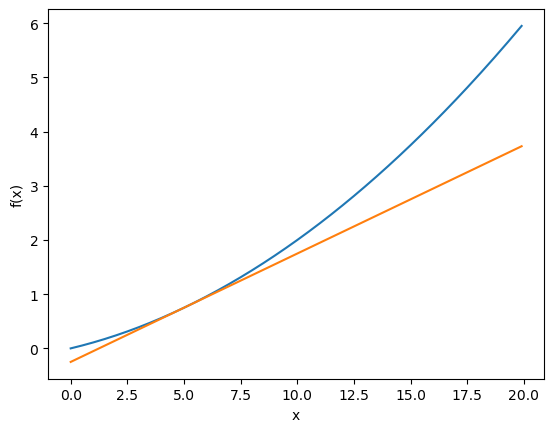

In [11]:
#gradient_1d.py
def function_1(x):
    return 0.01*x**2 + 0.1*x 


def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)


def tangent_line(f, x):
    d = numerical_diff(f, x)    #기울기 계산
    print(d)    #d출력
    y = f(x) - d*x  #y절편 계산
    return lambda t: d*t + y    #접선의 방정식 t가 대입되면 접선에서 좌표를 구할 수 있다.


x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)   #우리가 계산하기로 한 2차 함수
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)    #x=5인 위치에서 접선의 방정식을 구함, 원래 함수가 있기에 가능함
y2 = tf(x)#접선의 방정식을 나타냄(람다 함수를 통해서)

plt.plot(x, y)
plt.plot(x, y2)

## 4.4 기울기 (gradient)

In [12]:
# gradient_2d.py
def function_2(x):
    if x.ndim == 1: #1차원 배열인지 확인함
        return np.sum(x**2) #제곱의 합을 반환함
    else:
        return np.sum(x**2, axis=1) #행방향으로 제곱의 합을 반환함


def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성 그리고 값은 0으로 채워짐
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h # x+h 계산
        fxh1 = f(x) # f(x+h) 계산
        
        # f(x-h) 계산
        x[idx] = tmp_val - h # x-h 계산
        fxh2 = f(x) # f(x-h) 계산
        
        grad[idx] = (fxh1 - fxh2) / (2*h) #미분계수 계산 ( f(x+h) - f(x-h) )/ 2*h
        x[idx] = tmp_val # 값 복원
        
    return grad #grad 배열 반환


def numerical_gradient(f, X):
    if X.ndim == 1: #1차원 배열인지 확인함
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

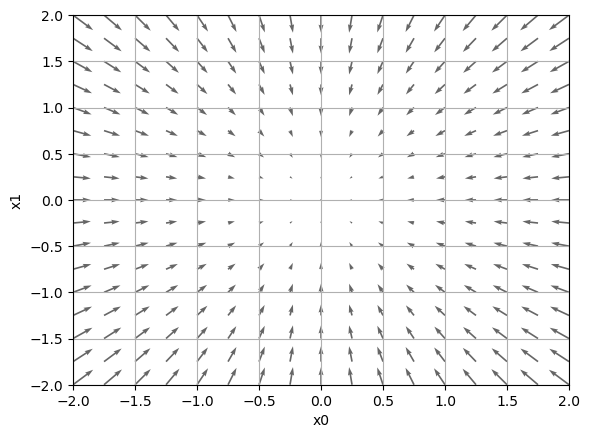

In [33]:
x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)
X, Y = np.meshgrid(x0, x1)

X = X.flatten()
Y = Y.flatten()

grad = numerical_gradient(function_2, np.array([X, Y]) )    #변화량(미분)을 계산함(2차원 좌표계에서)

plt.figure()    #그림 객체 생성
plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444"), 벡터 필드를 그리는 함수

#plt.quiver(X, Y, -grad[0], -grad[1], angles="xy", color="#666666")**는 벡터 필드를 그리는 함수입니다.
#X, Y: 벡터의 시작점(각 좌표)입니다.
#-grad[0], -grad[1]: 각 점에서의 기울기 벡터의 방향과 크기입니다. grad[0]는 x0 방향, grad[1]은 x1 방향의 기울기입니다. 음수 기울기를 사용해서 벡터가 함수의 감소 방향을 가리키게 만듭니다.(기울기의 음의 방향으로 조금씩 변경)
#angles="xy": 벡터의 방향을 x, y축에 맞게 조정합니다.
#color="#666666": 벡터의 색상을 지정합니다.

#결과적으로 이 코드는 각 (X, Y) 좌표에서 함수의 기울기 벡터를 그려서 2차원 평면에 벡터 필드를 시각화합니다. 이 벡터 필드는 함수의 기울기 방향(함수의 증가와 감소 방향)을 보여줍니다.



plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()  #
#plt.legend()
plt.draw()
plt.show()

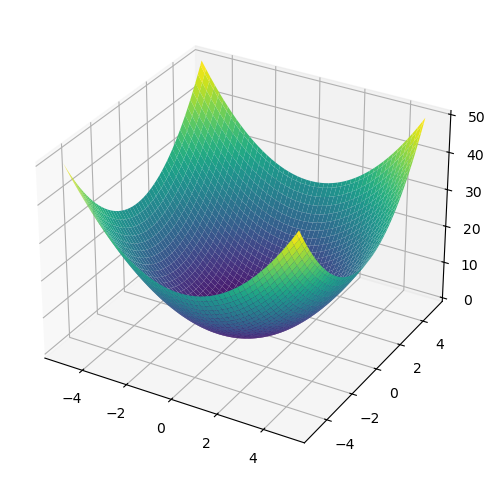

In [28]:
import numpy as np  #교재에 없는 예제
import matplotlib.pyplot as plt

x0 = np.linspace(-5, 5, 100)
x1 = np.linspace(-5, 5, 100)

X, Y = np.meshgrid(x0, x1)  #메시 그리드 생성
Z = X**2 + Y**2  # Z는 각 좌표에서의 함수 값

# 3D 플로팅
fig = plt.figure(figsize=(8, 6))    #그림 객체 생성
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

plt.show()

Text(0, 0.5, 'X1')

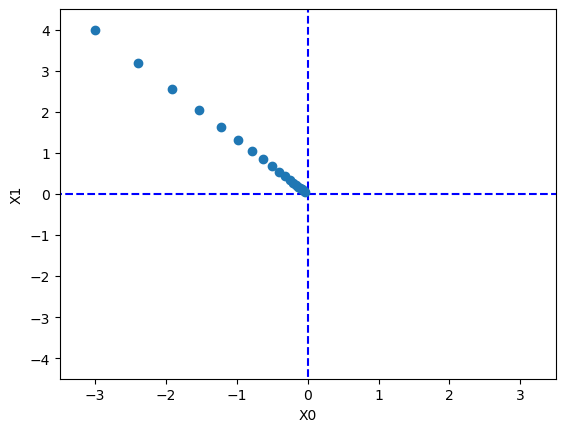

In [27]:
# gradient_method.py
# def function_2(x):
#     return x[0]**2 + x[1]**2

# from gradient_2d import numerical_gradient
def gradient_descent(f, init_x, lr=0.01, step_num=100): #경사 하강법
    x = init_x
    x_history = []  #경로를 저장할 리스트

    for i in range(step_num):
        x_history.append( x.copy() )    #매 단계에서 x값을 기록

        grad = numerical_gradient(f, x)#현재 x에서의 기울기 계산
        x -= lr * grad  #경사 하강법, 기울기 방향으로 갱신(학습률 * 기울기)

#f: 최소값을 찾고자 하는 함수입니다.
#init_x: 초기값, 즉, 시작점입니다.
#lr: **학습률(Learning Rate)**로, 한 스텝에서 얼마나 이동할지 결정하는 값입니다.
#step_num: 경사 하강법을 몇 번 반복할지를 결정하는 값입니다.
#x_history: 각 단계에서의 x값을 기록하는 리스트입니다. 이 값들은 시각화하는 데 사용됩니다.     
        
        
#경사 하강법의 업데이트 식:

#매 단계에서 grad = numerical_gradient(f, x)를 사용해 현재 위치에서의 기울기를 계산합니다.
#그 후 x -= lr * grad로 기울기의 방향으로 갱신해 나갑니다. 즉, 기울기가 가리키는 방향으로 함수를 감소시키는 방향으로 이동합니다.


    return x, np.array(x_history)   #마지막 위치와 경로 반환


init_x = np.array([-3.0, 4.0])    #시작점  (x0=-3.0, x1=4.0) 

lr = 0.1    #학률
step_num = 20   #반복 횟수
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)
#경사 하강법 실행
plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o') #변화를 보여줌, 각 스텝에서의 위치를 점으로 표시

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")

## 4.4.2 신경망에서의 기울기

In [43]:
# gradient_simplenet.py
import sys, os
sys.path.append("..\\deep_learning_from_scratch")  # 부모 디렉터리의 파일을 가져올 수 있도록 설정, 필요한 함수 파일이 존재해야함
from common.functions import softmax, cross_entropy_error   #소프트 맥스(e의 지수 함수)를 사용
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

net = simpleNet()

f = lambda w: net.loss(x, t)    # w is dummy
dW = numerical_gradient(f, net.W)

print(dW)   #결과는 매출력 마다 달라진다.  ##마저 이어 하기

[[ 0.07876785  0.40138599 -0.48015383]
 [ 0.11815177  0.60207898 -0.72023075]]


## 4.5.1 2층 신경망 클래스 구현하기

In [1]:
# two_layer_net.py 두 계층 신경망 네트워크
import sys, os
sys.path.append("D:\\CSC\\deep learning\\deep_learning_from_scratch")  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.functions import *
from common.gradient import numerical_gradient


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        """
        TwoLayerNet의 파라미터를 초기화합니다.

        Args:
        - input_size: 입력층의 뉴런 수
        - hidden_size: 숨겨진 층의 뉴런 수
        - output_size: 출력층의 뉴런 수 (분류할 클래스 수)
        - weight_init_std: 가중치 초기화의 표준편차
        """
        # 가중치와 편향 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size) #가중치는 랜덤으로 정하는 편
        self.params['b1'] = np.zeros(hidden_size) #바이어스는 일단 0
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        """
        네트워크를 통해 예측을 수행합니다.
    
        Args:
        - x: 입력 데이터
    
        Returns:
        - y: 예측된 확률 (softmax 출력)
        """
        W1, W2 = self.params['W1'], self.params['W2'] # 파라미터 정하기
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1 #가중치 계산
        z1 = sigmoid(a1) #시그모이드 함수를 통과 시켜 값을 결정(활성화 함수)
        a2 = np.dot(z1, W2) + b2 #2차 가중치 계산
        y = softmax(a2) #소프트 맥스 함수에 통과 시킴(시그모이드 함수를 인풋이 여러개일 때도 사용할 수 있도록 일반화 함)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        """
        손실 함수 (교차 엔트로피 손실)를 계산합니다.
    
        Args:
        - x: 입력 데이터
        - t: 실제 레이블 (one-hot 인코딩된 레이블)
    
        Returns:
        - loss: 교차 엔트로피 손실 값
        """    
        y = self.predict(x) #2층 학습
        
        return cross_entropy_error(y, t) #교차 엔트로피 방법, softmax를 거쳐서 나온 분포인 경우에 활용
    
    def accuracy(self, x, t):
        """
        네트워크의 정확도를 계산합니다.
    
        Args:
        - x: 입력 데이터
        - t: 실제 레이블 (one-hot 인코딩된 레이블)
    
        Returns:
        - accuracy: 정확도
        """    
        
        
        y = self.predict(x)
        y = np.argmax(y, axis=1) #훈련 시켜 얻는 최대값, 즉 출력
        t = np.argmax(t, axis=1) #실제 정답
        
        accuracy = np.sum(y == t) / float(x.shape[0])   # 훈련값 = 정답 / 데이터 개수 : 즉 얼마나 정확히 맞았는지 확인해줌
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        """
        수치적 방법으로 기울기를 계산합니다.
    
        Args:
        - x: 입력 데이터
        - t: 실제 레이블
    
        Returns:
        - grads: 가중치와 편향에 대한 기울기를 딕셔너리로 반환
        """
       
        loss_W = lambda W: self.loss(x, t) # 손실 함수 정의 (W에 대한 함수)
        
        grads = {}  #딕셔너리
        grads['W1'] = numerical_gradient(loss_W, self.params['W1']) #
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
    
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        #y: 신경망의 출력 (softmax 함수를 통해 나온 예측 확률).
        #t: 실제 레이블 (one-hot 인코딩된 정답).
        
        # backward
        dy = (y - t) / batch_num    #출력층에서의 기울기(오차)입니다. 출력 y와 실제 정답 t의 차이를 구한 뒤, batch_num (배치 크기)로 나누어 평균을 냅니다.
        grads['W2'] = np.dot(z1.T, dy)  #
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1 #은닉층 기울기 계산
        grads['W1'] = np.dot(x.T, dz1) # W1 기울기 계산 : 가중치 W1에 대한 기울기는 입력 데이터 x의 전치 행렬과 dz1의 곱으로 계산합니다. 이 값은 은닉층의 기울기를 입력층으로 전달하는 과정입니다.
        grads['b1'] = np.sum(dz1, axis=0)   # b1 기울기 계산 : 편향 b1에 대한 기울기는 dz1의 값을 축(axis=0)으로 더해줍니다. 이는 은닉층에서의 각 노드에 대한 편향 기울기를 계산하는 과정입니다.

        #이 과정을 통해 신경망의 각 층에 대해 가중치와 편향에 대한 기울기를 구할 수 있으며, 이를 이용해 경사 하강법(Gradient Descent) 을 사용하여 가중치와 편향을 업데이트할 수 있습니다.
        return grads

In [22]:
# 사용 예
net = TwoLayerNet(input_size=64, hidden_size=20, output_size=5) #클래스에 데이터 넣고, 가중치 조정계산하기
net.params

{'W1': array([[ 0.00419514,  0.0138274 , -0.00032094, ..., -0.0262905 ,
          0.00064047,  0.00634106],
        [ 0.00924061,  0.00183801,  0.00192476, ...,  0.00402361,
         -0.01215557, -0.00996333],
        [ 0.00878713, -0.00571144,  0.00040127, ...,  0.01004974,
         -0.00817788, -0.00212738],
        ...,
        [-0.00395103, -0.01486041, -0.00633025, ...,  0.01424922,
          0.00559307,  0.00152924],
        [-0.01155517,  0.01829246, -0.00557151, ..., -0.00157888,
         -0.00402965,  0.00794574],
        [ 0.00221205, -0.01431351, -0.0144216 , ..., -0.00598431,
         -0.00486105,  0.00550034]]),
 'b1': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 'W2': array([[ 2.27185046e-04, -5.73971943e-03, -7.34540090e-03,
         -9.53499017e-03, -5.41361540e-03],
        [-8.60116608e-03, -1.74161638e-02, -6.31095056e-03,
          4.04501732e-03, -2.65519904e-04],
        [-1.18047216e-02,  2.56433568e-04,  4.286

<BarContainer object of 5 artists>

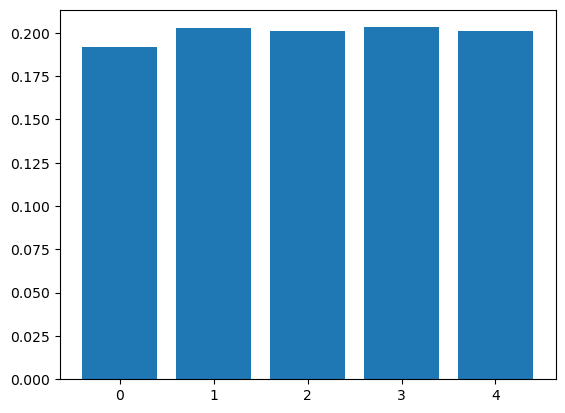

In [18]:
# forward prop
x = np.random.rand(100,64) #100개의 샘플을 생성하는 코드입니다. 각 샘플은 64차원의 입력 벡터로, 이 벡터는 랜덤한 값들로 채워집니다. 이는 가상의 입력 데이터로, 실제 학습 데이터는 아니지만 네트워크가 제대로 작동하는지 확인하기 위한 테스트 데이터입니다.
y = net.predict(x) #net 객체에 대해 예측을 수행하는 메서드입니다. net은 아마도 신경망 모델을 나타내는 객체이고, predict() 메서드는 주어진 입력 x에 대해 예측 결과를 출력합니다.

plt.bar(np.arange(0,5), y[0]) #output_size에 따라 범위가 달라진다. 0부터 4까지의 숫자를 생성

In [21]:
%%time #시간 측정
# calc numerical gradient
t = np.random.rand(100,5) #100개의 샘플 5차원의 입력 벡터
numerical_grads = net.numerical_gradient(x, t) #
numerical_grads

CPU times: total: 15.6 ms
Wall time: 201 ms


{'W1': array([[ 1.10090725e-05, -1.72260861e-05, -3.50472973e-05, ...,
         -5.23611210e-05,  1.46255319e-05, -4.33735159e-06],
        [-4.82495377e-05, -6.01224193e-05,  2.63360644e-05, ...,
         -1.64752474e-04,  1.06480988e-04, -1.32617930e-04],
        [-2.63818400e-05, -5.50499646e-06,  2.38451570e-05, ...,
          9.07988928e-05, -1.69276726e-05, -3.76997544e-06],
        ...,
        [-2.65135425e-05, -9.16456910e-07,  4.70951522e-05, ...,
          2.21591689e-05,  1.02321640e-05, -3.09232429e-05],
        [-4.09108136e-05, -1.74299519e-05,  1.61301233e-04, ...,
         -1.84794557e-05,  3.73218612e-05, -9.22340693e-05],
        [ 5.61509583e-05,  1.85813065e-05, -1.35771286e-04, ...,
         -1.25685817e-05, -3.64470609e-05,  9.16794740e-05]]),
 'b1': array([-5.32911504e-05, -6.96668123e-05, -3.31995587e-05, -6.85213497e-05,
        -4.61899596e-05, -6.93480950e-05,  1.24526969e-04, -6.70381350e-05,
        -9.48802936e-05, -1.52849577e-05, -1.27193700e-05,  1.795

In [23]:
%%time
grads = net.gradient(x, t)
grads

CPU times: total: 0 ns
Wall time: 2 ms


{'W2': array([[-0.16494076, -0.14395078, -0.16673081, -0.14931731, -0.14525508],
        [-0.16864599, -0.14753128, -0.1707163 , -0.15321223, -0.14914013],
        [-0.16459984, -0.1440127 , -0.16687224, -0.14902969, -0.14531475],
        [-0.159486  , -0.139177  , -0.16108072, -0.14421249, -0.14064625],
        [-0.16346728, -0.14260108, -0.16558293, -0.14789228, -0.14426677],
        [-0.16543581, -0.14447853, -0.16700764, -0.14996989, -0.1461842 ],
        [-0.15775663, -0.13774215, -0.15930459, -0.14270098, -0.13903244],
        [-0.16338239, -0.1427496 , -0.16512152, -0.14768491, -0.14422131],
        [-0.16518199, -0.14456009, -0.16754232, -0.14986538, -0.14605625],
        [-0.16306248, -0.14238131, -0.1648166 , -0.14793697, -0.14383608],
        [-0.16494414, -0.14413516, -0.16675412, -0.14944105, -0.14568743],
        [-0.1597619 , -0.13957796, -0.16179367, -0.14438103, -0.14075124],
        [-0.16474036, -0.14397028, -0.1662956 , -0.14902885, -0.14538608],
        [-0.1666615

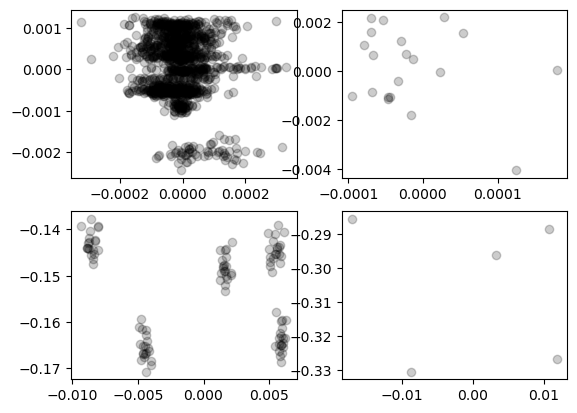

In [26]:
# 비교
plt.subplot(221) #2행 2열의 첫 번째 subplot을 의미합니다.
 #plt.scatter() 두 변수 간의 관계를 시각적으로 표현하는 산점도(scatter plot) 를 그리는 함수입니다.
plt.scatter(numerical_grads['W1'], grads['W1'], alpha=0.2, c='k') # numerical_grads['W1']: 수치적 기울기로 계산된 가중치 W1의 기울기 값. grads['W1']: **역전파(backpropagation)**를 통해 계산된 가중치 W1의 기울기 값. alpha=0.2: 투명도(0은 완전 투명, 1은 불투명)를 설정하는 인자입니다. 여기서는 0.2로 설정되어 있어, 점들이 조금 투명하게 표시됩니다. c='k': 점의 색상을 검은색(k)으로 설정합니다.
plt.subplot(222)
plt.scatter(numerical_grads['b1'], grads['b1'], alpha=0.2, c='k')
plt.subplot(223)
plt.scatter(numerical_grads['W2'], grads['W2'], alpha=0.2, c='k')
plt.subplot(224)
plt.scatter(numerical_grads['b2'], grads['b2'], alpha=0.2, c='k')

## MNIST 데이터로 학습 (4.5.2 미니배치 학습 구현하기 / 4.5.3 시험 데이터로 평가하기)

In [4]:
# train_neuralnet.py
import sys, os
sys.path.append("D:\\CSC\\deep learning\\deep_learning_from_scratch")  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist    #데이터
from two_layer_net import TwoLayerNet #위에서 다루었던 함수들 있음

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
#input_size=784: 입력 데이터는 28x28 픽셀 이미지를 벡터로 펼친 크기인 784차원입니다.
# hidden_size=50: 은닉층에 50개의 뉴런을 설정합니다.
# output_size=10: 출력층에는 10개의 뉴런이 있으며, 이는 0부터 9까지의 숫자 클래스에 대한 예측을 의미합니다.

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]   #데이터 개수 대입,x_train.shape[0]: 훈련 데이터 x_train의 첫 번째 차원(행의 개수, 즉 샘플 개수)을 가져옵니다.
# train_size: 훈련 데이터의 샘플 개수를 나타냅니다. x_train은 MNIST 데이터셋에서 (60000, 784) 형태를 가집니다. 즉, 60,000개의 샘플이 있으며, 각 샘플은 784차원으로 펼쳐진 이미지입니다.
# 예를 들어, x_train의 크기가 (60000, 784)이면, train_size = 60000이 됩니다.
batch_size = 100   # 미니배치 크기, 매번 100개의 샘플을 랜덤하게 선택하여 기울기를 계산하고 가중치를 업데이트합니다.
learning_rate = 0.1 #**learning_rate**는 신경망 학습에서 가중치를 얼마나 빠르게 업데이트할지 결정하는 중요한 하이퍼파라미터입니다.
# 학습률이 너무 크면 가중치가 최적값을 지나쳐 버리고, 너무 작으면 학습이 너무 느리거나 멈추게 될 수 있습니다.
# **learning_rate = 0.1**로 설정하면, 매번 가중치를 업데이트할 때 기울기 값에 0.1을 곱해주는 방식으로 업데이트가 이루어집니다.


train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1) # 에폭(epoch) 동안 미니배치로 처리할 반복 횟수를 계산합니다. train_size를 batch_size로 나누어, 한 에폭에 필요한 반복 수를 구합니다.

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size) # 미니배치 샘플을 랜덤하게 선택
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    # grad = network.numerical_gradient(x_batch, t_batch)   # TOO SLOW TO RUN
    grad = network.gradient(x_batch, t_batch)    # faster! (Next chapter) 
    # 기울기 계산 (미분), 경사 하강법 진행
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key] # 가중치 업데이트 W, b
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)   # 현재 배치에 대한 손실 계산   
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train) # 훈련 정확도 계산
        test_acc = network.accuracy(x_test, t_test) # 테스트 정확도 계산
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

train acc, test acc | 0.10218333333333333, 0.101
train acc, test acc | 0.7905, 0.7922
train acc, test acc | 0.8768666666666667, 0.8798
train acc, test acc | 0.8976666666666666, 0.9011
train acc, test acc | 0.90645, 0.9093
train acc, test acc | 0.9144666666666666, 0.9166
train acc, test acc | 0.9190166666666667, 0.9193
train acc, test acc | 0.9232333333333334, 0.9244
train acc, test acc | 0.9276333333333333, 0.9291
train acc, test acc | 0.9309333333333333, 0.9313
train acc, test acc | 0.93405, 0.9333
train acc, test acc | 0.9356833333333333, 0.9369
train acc, test acc | 0.9385166666666667, 0.9386
train acc, test acc | 0.9404833333333333, 0.9403
train acc, test acc | 0.9428666666666666, 0.9422
train acc, test acc | 0.9441833333333334, 0.9425
train acc, test acc | 0.9466, 0.9448


Text(0, 0.5, 'loss')

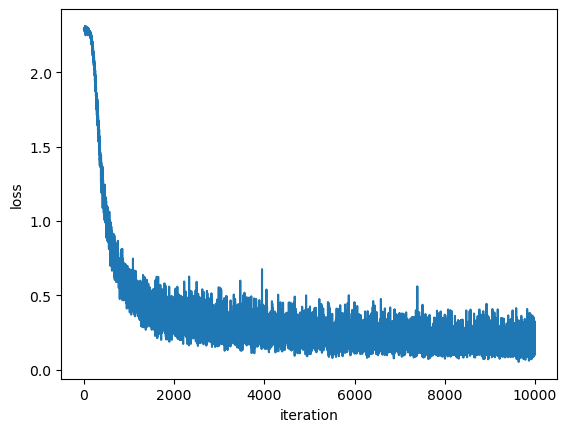

In [5]:
# 손실 함수
plt.plot(train_loss_list)
plt.xlabel('iteration')
plt.ylabel('loss')

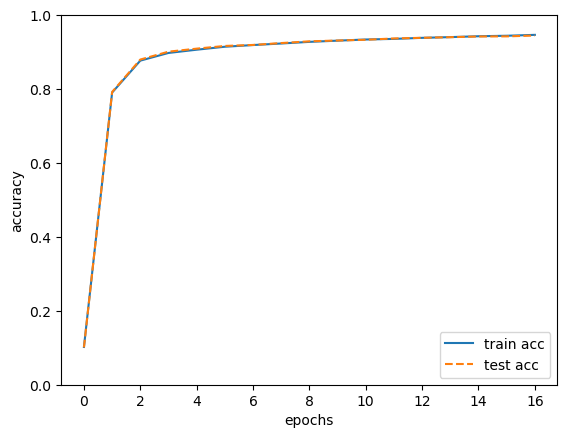

In [6]:
# 정확도 그래프
# markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()